/Users/ciaranohare/anaconda/lib/python2.7/site-packages/cryptography/hazmat/primitives/constant_time.py:26: CryptographyDeprecationWarning: Support for your Python version is deprecated. The next version of cryptography will remove support. Please upgrade to a 2.7.x release that supports hmac.compare_digest as soon as possible.
  utils.DeprecatedIn23,


PlotFuncs.py:246: RuntimeWarning: divide by zero encountered in log
  fv = log(fv)



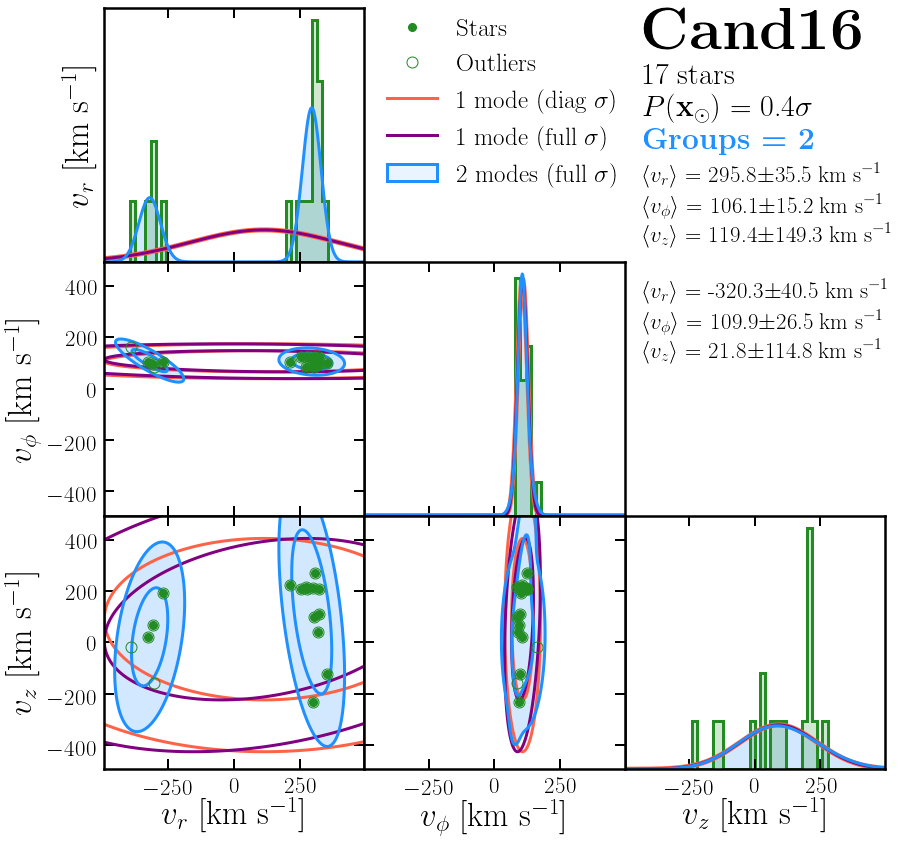

18


In [1]:
from numpy import *
from numpy.random import *
from PlotFuncs import *
import pandas

# Load all stars
df = pandas.read_csv('../data/GAIA_SDSS_Shards.csv')
names = df.group_id.unique()
num_cands = size(names)
colsubs = flipud(cm.Spectral(linspace(0.0,1.0,num_cands)))

for i_cand in range(18,19):
    Cand = df.loc[df['group_id'] == names[i_cand]].reset_index()
    fig = VelocityTriangle(Cand)
    plt.show()
    #plt.close(fig)

    #fig = XY_XZ(Cand,StarsColour=colsubs[i_cand,:],Grid=False)
    #plt.close(fig)
    print i_cand


In [ ]:
# SAVING DATA

# Set up data frames
params = ['x','y','z','dx','dy','dz','vx','vy','vz','sigx','sigy','sigz','feh','dfeh','population','Psun']
nparams = size(params)
dat = zeros(shape=(1,nparams))
df_shards = pandas.DataFrame(dat,columns=params)
shard_names = ' '

# Loop over shards
for i_cand in range(0,num_cands):
    # Get shard
    Cand = df.loc[df['group_id'] == names[i_cand]]
        
    # fit data
    x_meens,x_covs,v_meens,v_covs,fehs,pops,Psun = FitStars(Cand)
    ng = shape(x_meens)[0]

    
    # Add groups to data frame
    if ng==1:
        dat = zeros(shape=(1,nparams))
        shard_names = vstack((shard_names,names[i_cand]))
        sig_x = sqrt(array([x_covs[0,0,0],x_covs[0,1,1],x_covs[0,2,2]]))
        sig_v = sqrt(array([v_covs[0,0,0],v_covs[0,1,1],v_covs[0,2,2]]))
        dat[0,:] = append(append(concatenate((x_meens[0,:],sig_x,v_meens[0,:],sig_v,fehs)),pops),Psun)
        df1 = pandas.DataFrame(dat,columns=params)
    else:
        dat = zeros(shape=(2,nparams))
        shard_names = vstack((shard_names,names[i_cand]+'a'))
        shard_names = vstack((shard_names,names[i_cand]+'b'))
        sig_x = sqrt(array([x_covs[0,0,0],x_covs[0,1,1],x_covs[0,2,2]]))
        sig_v = sqrt(array([v_covs[0,0,0],v_covs[0,1,1],v_covs[0,2,2]]))
        dat[0,:] = append(append(concatenate((x_meens[0,:],sig_x,v_meens[0,:],sig_v,fehs[0,:])),pops[0]),Psun)
    
        sig_x = sqrt(array([x_covs[1,0,0],x_covs[1,1,1],x_covs[1,2,2]]))
        sig_v = sqrt(array([v_covs[1,0,0],v_covs[1,1,1],v_covs[1,2,2]]))
        dat[1,:] = append(append(concatenate((x_meens[1,:],sig_x,v_meens[1,:],sig_v,fehs[1,:])),pops[1]),Psun)
        
        df1 = pandas.DataFrame(dat,columns=params)
        
    df_shards = df_shards.append(df1,ignore_index=True)
    
# Join names column
df_names = pandas.DataFrame(shard_names,columns=['group_id'])
df_shards = df_names.join(df_shards)
df_shards = df_shards.drop([0]).reset_index(drop=True)
df_shards.to_csv('../data/FitShards.csv',float_format='%.8f',index=False)
df_shards

In [ ]:
fig = Orbits(Cand,xlim=16,ylim=16,zlim=16,T_Myr=40.0)
plt.show()
plt.close(fig)